In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

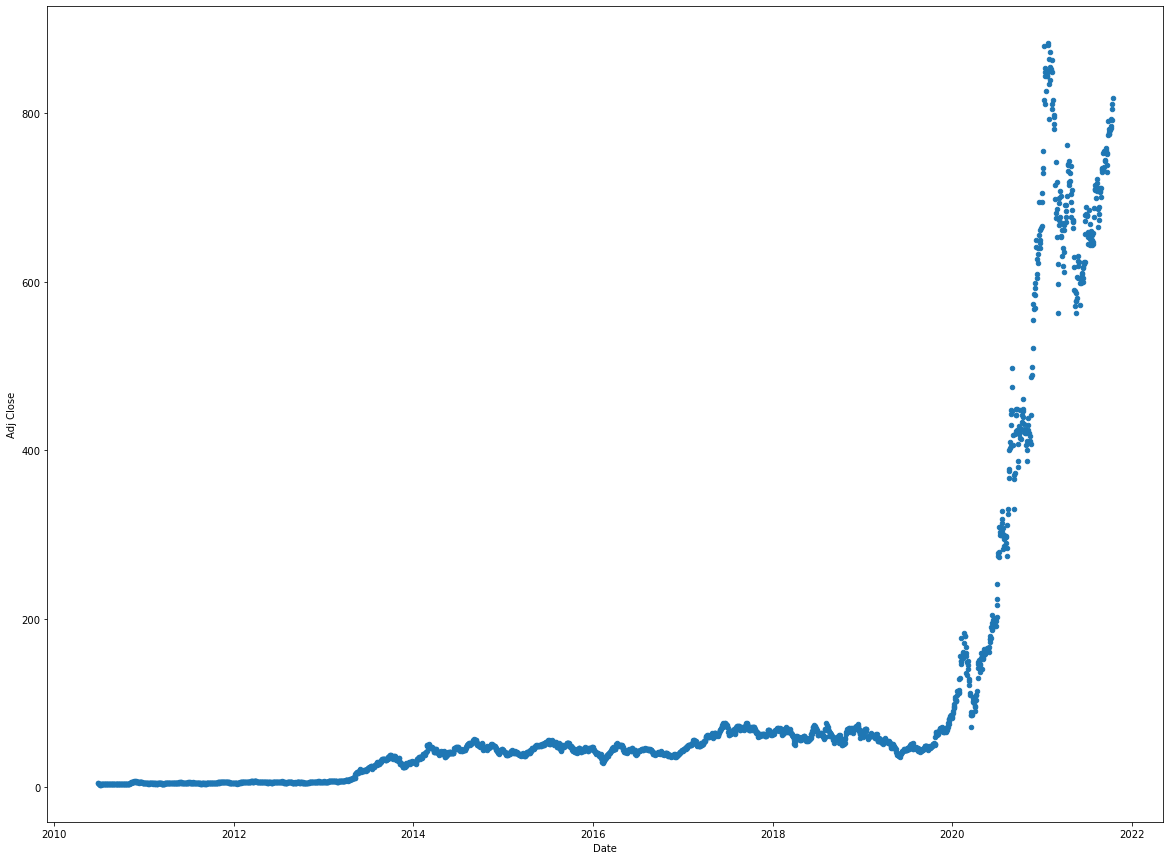

In [3]:
#Visualised the correlation between date and adj close
df.plot.scatter(figsize=(20,15), x = 'Date', y = 'Adj Close')

In [4]:
#Changed date to int in order to train a model
#This function converts a date to the xth day after 01.01.01
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [6]:
#Preparing dataset for training
x = df.values
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.inverse_transform(x)
df = pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6
0,3.028286e+09,3378.205619,4488.696120,3050.058748,4207.465669,4207.465669,2.853430e+16
1,3.028290e+09,4584.316042,5461.124362,4050.690528,4196.906509,4196.906509,2.613311e+16
2,3.028294e+09,4443.988025,4653.757740,3524.316519,3867.812679,3867.812679,1.249675e+16
3,3.028298e+09,4088.727223,4147.807991,3253.312078,3382.091304,3382.091304,7.815104e+15
4,3.028315e+09,3555.836020,3591.622096,2752.996188,2838.294547,2838.294547,1.044117e+16


In [7]:
X = pd.DataFrame(df[0]) #date
y = pd.DataFrame(df[5]) #adj close
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions